In [1]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import tensorflow as tf
import sqlite3
import requests
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# Display all of the columns
pd.set_option('display.max_columns', None)

In [3]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_time.db'
# Download the database file
r = requests.get(url)
with open('claimed_time.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_time.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [4]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [5]:
df_reduce =df.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'NumberWithDash'], inplace=False)
df_reduce

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment
0,870038,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142
1,870040,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124
2,870040,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47
3,870040,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124
4,870040,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,876966,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Fab/Layout,16751
8403,876966,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Material Handling,17
8404,876966,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Weld,4153
8405,904279,1,PLATE,9.92,94.903,25.14,PL,3/16 x 15,"D - Steel, Paint All",1,0,Fab/Layout,9562


In [13]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID         2058
EPM_InstanceNumber                   669
Assembly_MainPieceProductionCode      58
Assembly_MainPartLengthFt            944
Assembly_WeightEachLbs              1642
Assembly_SurfaceAreaEachSqFt        1530
Assembly_MainPartShape                19
Assembly_MainPartDimension           340
Assembly_MainPartFinishDescr          11
Assembly_TotalQuantityInJob           58
Assembly_NumSmallParts                89
EPM_AdjustedStationName                8
TimeInSeconds_ThisWorkSegment       2670
dtype: int64


In [14]:
# Look at  value counts for binning
#df_type_counts = df_reduce["EPM_AdjustedStationName"].value_counts()
#print(df_type_counts)

In [15]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM BEAM,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM CHKD PLATE,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PIPE LADDER,Assembly_MainPieceProductionCode_ALUM PIPE SLEEVE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ALUM TUBE COLUMN,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_BRACE,Assembly_MainPieceProductionCode_BRACKET,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_CHK PLATE,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_DOOR PLATE,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED ANGLE,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_GALV. STRINGER,Assembly_MainPieceProductionCode_GUSSET PL,Assembly_MainPieceProductionCode_H BRACE,Assembly_MainPieceProductionCode_HSS STRUT,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_S.S. BENT PLATE,Assembly_MainPieceProductionCode_S.S. EMBED ANGLE,Assembly_MainPieceProductionCode_S.S. PLATE,Assembly_MainPieceProductionCode_S.S. PLATE LADDER,Assembly_MainPieceProductionCode_S.S. TUBE STEEL,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_SS PLATE,Assembly_MainPieceProductionCode_STAIR STRINGER,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS CHORD,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_TUBE STEEL BRIDGING,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPieceProductionCode_WASHER,Assembly_MainPieceProductionCode_WT,Assembly_MainPieceProductionCode_WT SHEAR COLLECTOR,Assembly_MainPieceProductionCode_WT TOP TRUSS,Assembly_MainPieceProductionCode_WT TRUSS,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPartDimension_1/2 x 22,Assembly_MainPartDimension_1/2 x 29 §,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 3 1/2,Assembly_MainPartDimension_1/2 x 3 15/16 §,Assembly_MainPartDimension_1/2 x

In [16]:
# Split target column from dataset

y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment']
X = df_reduce_encoded.drop(columns='TimeInSeconds_ThisWorkSegment')

In [17]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (8407, 443)
Targe Shape: (8407,)


In [8]:
# Encode the categorical variables using get_dummies
#X = pd.get_dummies(X)

In [ ]:
# Preview the data
#X.head()

In [ ]:
## need to check to see if we need to do the get dummies also on the y-target

In [18]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Display the shapes of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (6305, 443)
Training Target Shape: (6305,)
Testing Features Shape: (2102, 443)
Testing Target Shape: (2102,)


In [20]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [ ]:
#X_train.select_dtypes(include='object').head()

In [21]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [22]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fitting the Random Forest Model

In [25]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [27]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 250547529.0675547
Mean Absolute Error: 2021.1769743101809
R-squared: -1.2579123257148201


In [30]:

# Calculating the confusion matrix
#cm = confusion_matrix(y_test, predictions)
#cm_df = pd.DataFrame(
   # cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
#)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [31]:
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.17840152235965748
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       203
           1       0.41      0.45      0.43       150
           2       0.43      0.46      0.44        65
           3       0.34      0.38      0.36        81
           4       0.14      0.14      0.14        63
           5       0.22      0.28      0.25        40
           6       0.23      0.21      0.22        34
           7       0.13      0.14      0.13        29
           8       0.26      0.30      0.28        30
           9       0.20      0.19      0.19        27
          10       0.05      0.08      0.06        13
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        10
          14       0.44      0.44      0.44         9
          15       0.50      0.43      0.46         7
          16       0.3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [36]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted_features =sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
top_10_features = sorted_features[:10]
top_10_features

[(0.27576807371000134, 'EPM_InstanceNumber'),
 (0.12148349129521895, 'EPM_ProductionControlItemID'),
 (0.08248227752105451, 'Assembly_WeightEachLbs'),
 (0.08139088745496009, 'Assembly_SurfaceAreaEachSqFt'),
 (0.07544141003128693, 'Assembly_MainPartLengthFt'),
 (0.050531996953101836, 'Assembly_TotalQuantityInJob'),
 (0.048076350484726145, 'Assembly_NumSmallParts'),
 (0.017806176060217564, 'EPM_AdjustedStationName_Fab/Layout'),
 (0.015257330084239904, 'EPM_AdjustedStationName_Weld'),
 (0.012888395334446823, 'EPM_AdjustedStationName_Material Handling')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

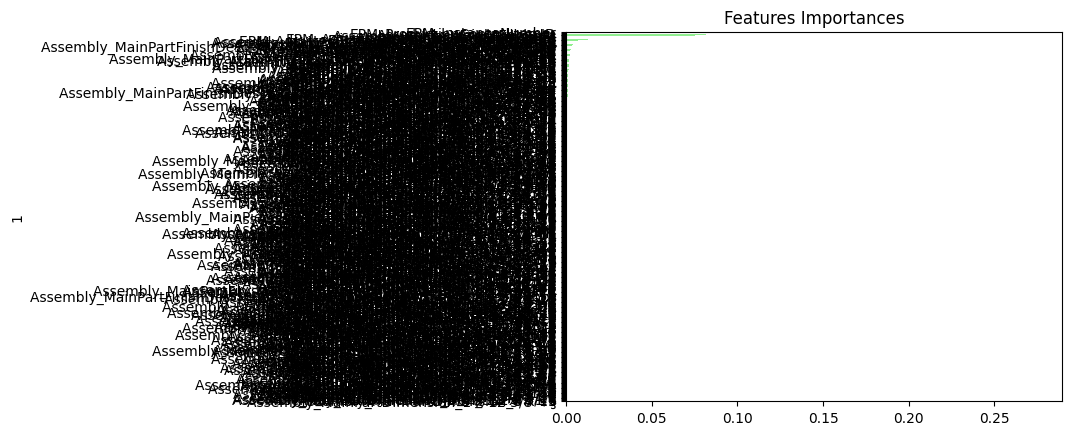

In [33]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [ ]:
!pip install holoviews pandas bokeh
!pip install hvplot
import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')

In [44]:


# Create a scatter plot of TimeInSeconds_ThisWorkSegment versus EPM_MainMark information
time_plot = df.hvplot.scatter(
    x="EPM_MainMark",
    y="TimeInSeconds_ThisWorkSegment",
    title="Expected LOE"
)
time_plot

:Scatter   [EPM_MainMark]   (TimeInSeconds_ThisWorkSegment)